<font color="brown" size=7> Scratch Paper


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', "rb") as my_file:
    sd = pickle.load(my_file)

In [31]:
def plot_raster( sd, title="", axs=None, xlim=None, smoothness=1000, size=(16,6) ):
    pop_rate = sd.binned(bin_size=1)
    pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=smoothness)
    bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/ 1000
    
    if axs is None:
        fig, axs = plt.subplots(1, 1, figsize=size )
    axs.set_title(title, fontsize=12)

    y = 0
    for vv in sd.train:
        axs.scatter(vv, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
        y += 1
    axs.set_xlabel("Time (s)", fontsize=16)
    axs.set_ylabel("Unit", fontsize=16)
    axs.xaxis.set_tick_params(labelsize=16)
    axs.yaxis.set_tick_params(labelsize=16)
    
    axs1 = axs.twinx()
    axs1.yaxis.set_label_position("right") 
    axs1.spines['right'].set_color('r')
    axs1.spines['right'].set_linewidth(3)
    axs1.plot(bins, pop_fr, color='r', linewidth=3, alpha=0.6)
    axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
    axs1.set_xlabel("Time (s)", fontsize=16)
    axs1.yaxis.set_tick_params(labelsize=16)
    axs1.set_xlim(xlim)
    #axs1.set_ylim(ylim)

    axs1.spines['top'].set_visible(False)
    axs1.get_xaxis().set_visible(False)
    axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                    bottom=False, labelbottom=True)
    axs1.tick_params(axis='y', colors='r')

    return axs, axs1

In [24]:
# Get population rate for everything
#bin_size=1
#pop_rate = sd.binned(bin_size=bin_size)  # in ms

# Lets smooth this to make it neater
pop_rate = sd.binned(bin_size=1)
pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=smoothness)
t = np.linspace(0, sd.length, pop_rate.shape[0] ) #/ 1000


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

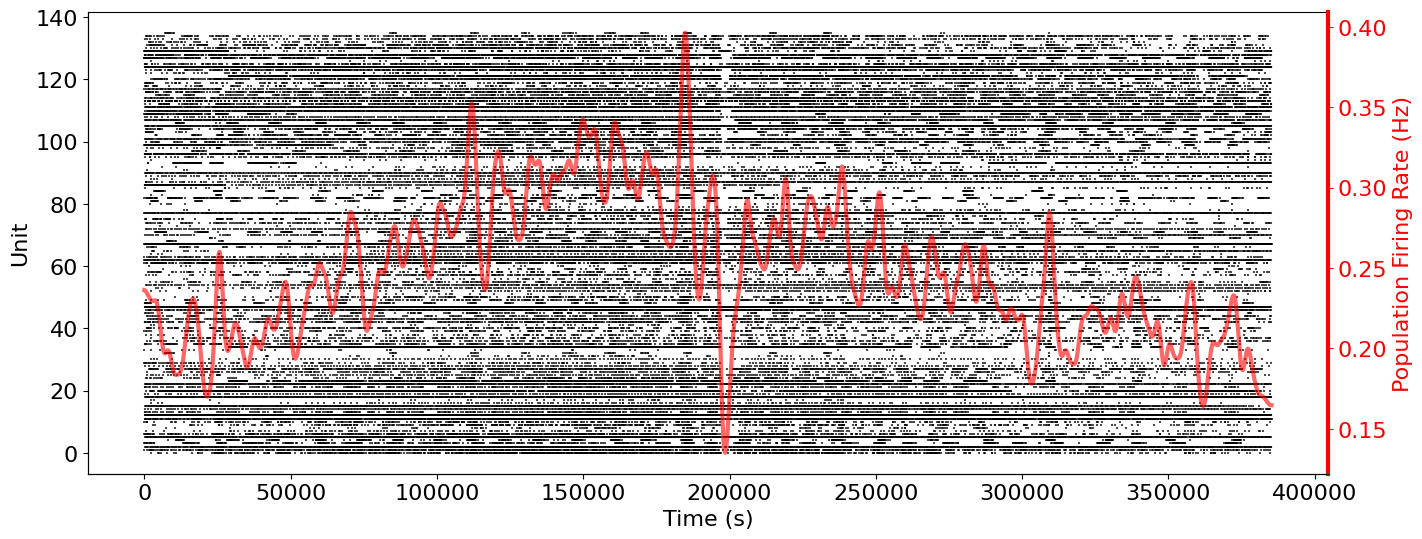

In [32]:
plot_raster(sd)

# <font color="brown">Plot Footprint

In [4]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import random

In [2]:
with open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', "rb") as my_file:
    sd = pickle.load(my_file)

In [5]:
def plot_footprint( sd, neuron_id):
    
    # Scatter plot of neurons
    plt.figure(figsize=(8, 8))
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.scatter(neuron_x, neuron_y, alpha=0.10, c='grey')
  
    # Plot neuron geographic location
    for neighbor in  sd.neuron_data[0][neuron_id]['neighbor_positions']:
        plt.scatter( [neighbor[0]+random.random()*13], [neighbor[1]+random.random()*10], alpha=0.40, c='blue')

    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Directionality plot")
    plt.show()

/tmp/ipykernel_18538/2405340495.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_18538/2405340495.py:13: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neighbor in  sd.neuron_data[0][neuron_id]['neighbor_positions']:


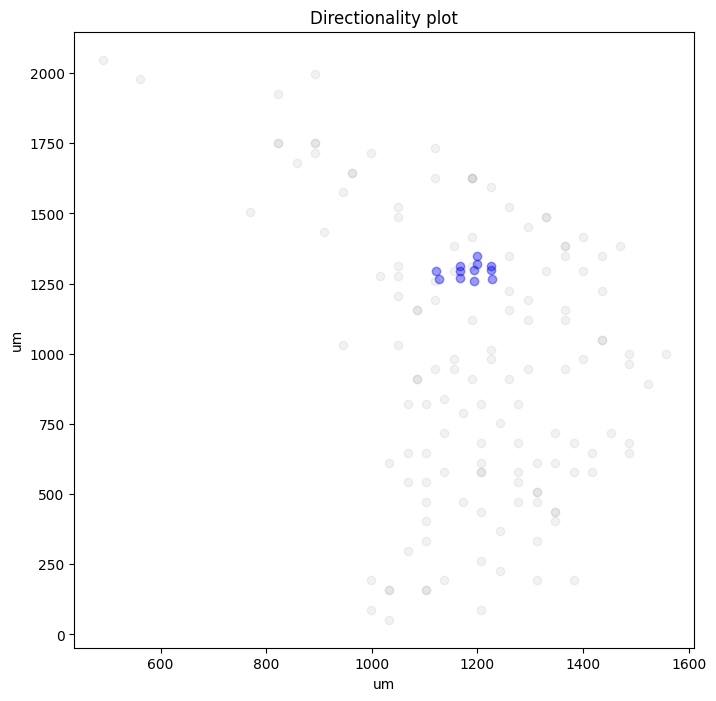

In [6]:
plot_footprint(sd, 1)